<a href="https://colab.research.google.com/github/vidya715/Vidya-jagtap-/blob/main/random_forest_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy (Benign): 0.9171052631578948
Recall (Benign): 0.4368932038834951
Precision (Benign): 0.9
F1 Score (Benign): 0.5882352941176471


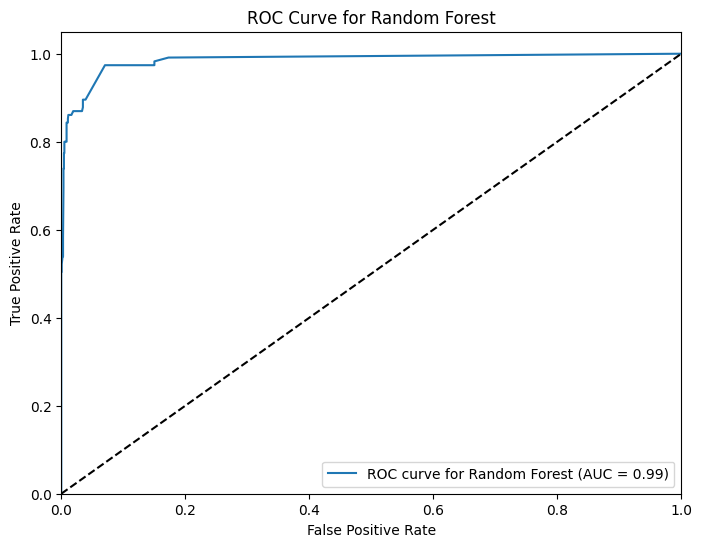

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for Benign class
TP_benign = sum((y_pred == y_test) & (y_pred == 'Benign'))
TN_benign = sum((y_pred == y_test) & (y_pred != 'Benign'))
FP_benign = sum((y_pred != y_test) & (y_pred == 'Benign'))
FN_benign = sum((y_pred != y_test) & (y_pred != 'Benign'))

# Calculate accuracy for Benign class
accuracy_benign = (TP_benign + TN_benign) / (TP_benign + TN_benign + FP_benign + FN_benign)

# Calculate recall for Benign class
recall_benign = TP_benign / (TP_benign + FN_benign)

# Calculate precision for Benign class
precision_benign = TP_benign / (TP_benign + FP_benign)

# Calculate F1-score for Benign class
f1_benign = 2 * (precision_benign * recall_benign) / (precision_benign + recall_benign)

# Print the evaluation metrics for Benign class
print("Accuracy (Benign):", accuracy_benign)
print("Recall (Benign):", recall_benign)
print("Precision (Benign):", precision_benign)
print("F1 Score (Benign):", f1_benign)


# Plot ROC curve for Benign class only
plt.figure(figsize=(8, 6))
y_true_binary_benign = y_test == 'Benign'
y_score_benign = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('Benign')]
fpr_benign, tpr_benign, _ = roc_curve(y_true_binary_benign, y_score_benign)
roc_auc_benign = auc(fpr_benign, tpr_benign)
plt.plot(fpr_benign, tpr_benign, label=f'ROC curve for Random Forest (AUC = {roc_auc_benign:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


Accuracy (Reveton): 0.9201183431952663
Recall (Reveton): 0.6995708154506438
Precision (Reveton): 0.9367816091954023
F1 Score (Reveton): 0.800982800982801


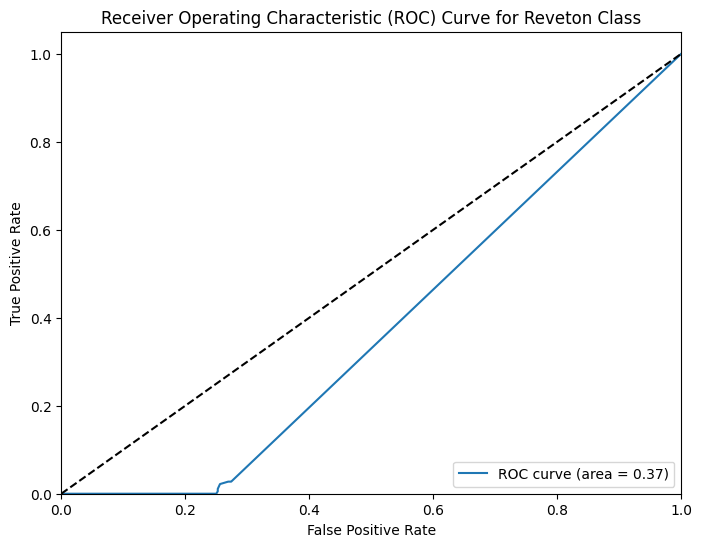

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for Reveton class
TP = sum((y_pred == y_test) & (y_pred == 'Reveton'))
TN = sum((y_pred == y_test) & (y_pred != 'Reveton'))
FP = sum((y_pred != y_test) & (y_pred == 'Reveton'))
FN = sum((y_pred != y_test) & (y_pred != 'Reveton'))

# Calculate accuracy for Reveton class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate recall for Reveton class
recall = TP / (TP + FN)

# Calculate precision for Reveton class
precision = TP / (TP + FP)

# Calculate F1-score for Reveton class
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics for Reveton class
print("Accuracy (Reveton):", accuracy)
print("Recall (Reveton):", recall)
print("Precision (Reveton):", precision)
print("F1 Score (Reveton):", f1)

# Plot ROC curve for Reveton class only
plt.figure(figsize=(8, 6))
y_true_binary = y_test == 'Reveton'
y_score = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('Reveton')]
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Reveton Class')
plt.legend(loc="lower right")
plt.show()


Accuracy (Cerber): 0.9201183431952663
Precision (Cerber): 0.9836065573770492
Recall (Cerber): 0.6976744186046512
F1 Score (Cerber): 0.8163265306122448


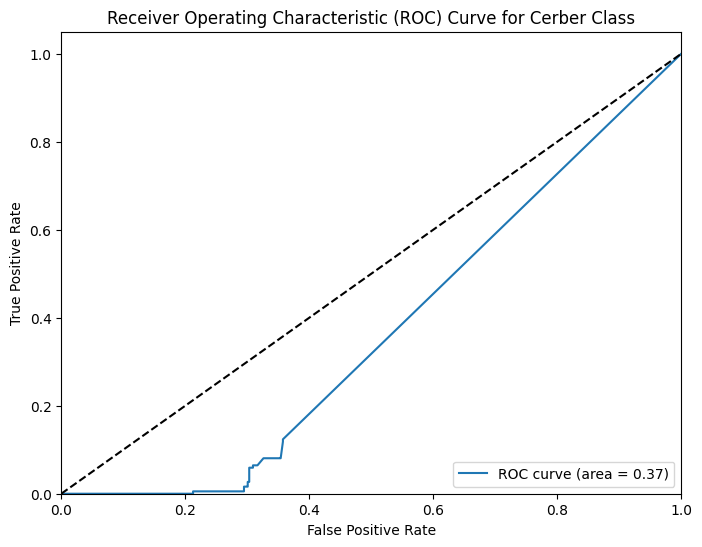

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for Cerber class
TP = sum((y_pred == y_test) & (y_pred == 'Cerber'))
TN = sum((y_pred == y_test) & (y_pred != 'Cerber'))
FP = sum((y_pred != y_test) & (y_pred == 'Cerber'))
FN = sum((y_pred != y_test) & (y_pred != 'Cerber'))

# Calculate accuracy for Cerber class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate recall for Cerber class
recall = TP / (TP + FN)

# Calculate precision for Cerber class
precision = TP / (TP + FP)

# Calculate F1-score for Cerber class
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics for Cerber class
print("Accuracy (Cerber):", accuracy)
print("Precision (Cerber):", precision)
print("Recall (Cerber):", recall)
print("F1 Score (Cerber):", f1)

# Plot ROC curve for Cerber class only
plt.figure(figsize=(8, 6))
y_true_binary = y_test == 'Cerber'
y_score = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('Cerber')]
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Cerber Class')
plt.legend(loc="lower right")
plt.show()


Accuracy (Locky): 0.9201183431952663
Precision (Locky): 0.817351598173516
Recall (Locky): 0.8136363636363636
F1 Score (Locky): 0.815489749430524


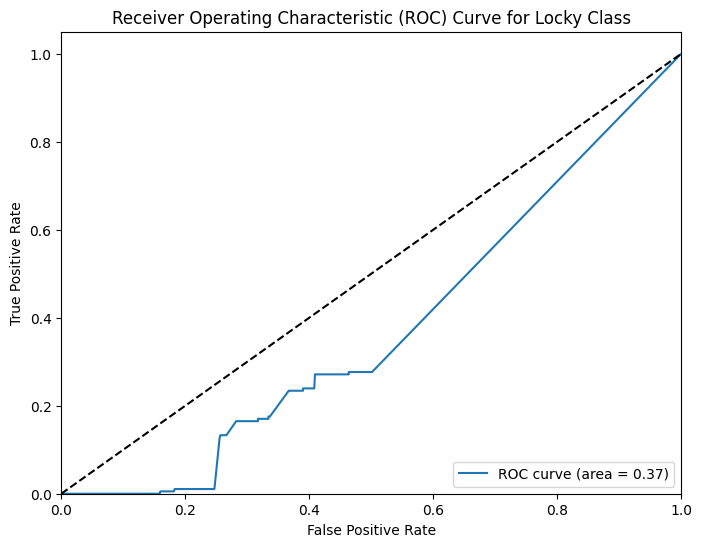

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for Locky class
TP = sum((y_pred == y_test) & (y_pred == 'Locky'))
TN = sum((y_pred == y_test) & (y_pred != 'Locky'))
FP = sum((y_pred != y_test) & (y_pred == 'Locky'))
FN = sum((y_pred != y_test) & (y_pred != 'Locky'))

# Calculate accuracy for Locky class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate recall for Locky class
recall = TP / (TP + FN)

# Calculate precision for Locky class
precision = TP / (TP + FP)

# Calculate F1-score for Locky class
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics for Locky class
print("Accuracy (Locky):", accuracy)
print("Precision (Locky):", precision)
print("Recall (Locky):", recall)
print("F1 Score (Locky):", f1)

# Plot ROC curve for Locky class only
plt.figure(figsize=(8, 6))
y_true_binary = y_test == 'Locky'
y_score = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('Locky')]
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Locky Class')
plt.legend(loc="lower right")
plt.show()


Accuracy (teslacrypt): 0.9201183431952663
Precision (teslacrypt): 0.9680851063829787
Recall (teslacrypt): 0.708171206225681
F1 Score (teslacrypt): 0.8179775280898876


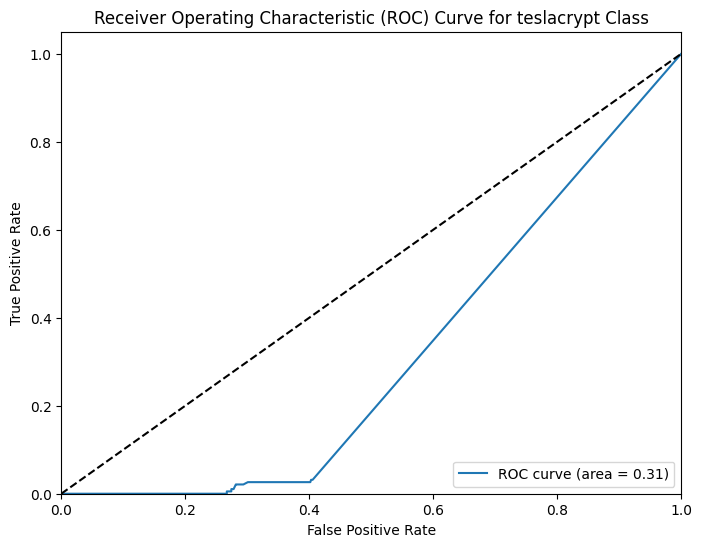

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for teslacrypt class
TP = sum((y_pred == y_test) & (y_pred == 'teslacrypt'))
TN = sum((y_pred == y_test) & (y_pred != 'teslacrypt'))
FP = sum((y_pred != y_test) & (y_pred == 'teslacrypt'))
FN = sum((y_pred != y_test) & (y_pred != 'teslacrypt'))

# Calculate accuracy for teslacrypt class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate recall for teslacrypt class
recall = TP / (TP + FN)

# Calculate precision for teslacrypt class
precision = TP / (TP + FP)

# Calculate F1-score for teslacrypt class
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics for teslacrypt class
print("Accuracy (teslacrypt):", accuracy)
print("Precision (teslacrypt):", precision)
print("Recall (teslacrypt):", recall)
print("F1 Score (teslacrypt):", f1)

# Plot ROC curve for teslacrypt class only
plt.figure(figsize=(8, 6))
y_true_binary = y_test == 'teslacrypt'
y_score = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('teslacrypt')]
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for teslacrypt Class')
plt.legend(loc="lower right")
plt.show()


Accuracy (Yakes): 0.9201183431952663
Precision (Yakes): 0.9314285714285714
Recall (Yakes): 0.7025862068965517
F1 Score (Yakes): 0.800982800982801


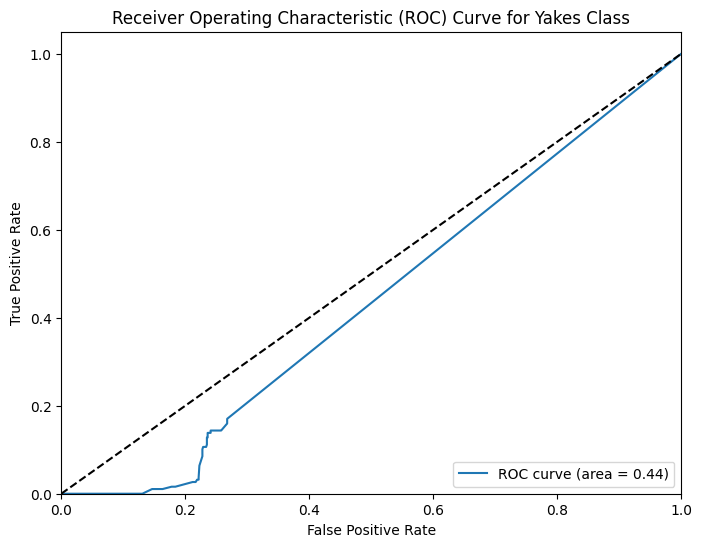

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("/content/Dataset.txt", header=None)

# Define class labels and their corresponding original sample counts
class_labels = {
    "Benign": 438,
    "Reveton": 948,
    "Cerber": 897,
    "teslacrypt": 914,
    "Locky": 944,
    "Yakes": 925
}

# Adjust sampling strategy to ensure it's feasible for over-sampling
sampling_strategy = {label: min(count, len(df)) for label, count in class_labels.items()}

# Oversample the minority classes to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(df.iloc[:, :-1], df.iloc[:, -1])

# Split the resampled data into features and target
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=75)

# Instantiate and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10)
classifier.fit(x_train, y_train)

# Generate predictions
y_pred = classifier.predict(x_test)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for Yakes class
TP = sum((y_pred == y_test) & (y_pred == 'Yakes'))
TN = sum((y_pred == y_test) & (y_pred != 'Yakes'))
FP = sum((y_pred != y_test) & (y_pred == 'Yakes'))
FN = sum((y_pred != y_test) & (y_pred != 'Yakes'))

# Calculate accuracy for Yakes class
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate recall for Yakes class
recall = TP / (TP + FN)

# Calculate precision for Yakes class
precision = TP / (TP + FP)

# Calculate F1-score for Yakes class
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics for Yakes class
print("Accuracy (Yakes):", accuracy)
print("Precision (Yakes):", precision)
print("Recall (Yakes):", recall)
print("F1 Score (Yakes):", f1)

# Plot ROC curve for Yakes class only
plt.figure(figsize=(8, 6))
y_true_binary = y_test == 'Yakes'
y_score = classifier.predict_proba(x_test)[:, list(class_labels.keys()).index('Yakes')]
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Yakes Class')
plt.legend(loc="lower right")
plt.show()
